# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Keery, Sean]

### Part (b): Course Number

[CS 109a]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [47]:
df= pd.read_csv("dataset_HW1.txt")
#top 5 rows
df.head()

,patient_id,marker_1,marker_2,subtype,patient_age,patient_gender
0,619681,21.640523,144.001572,0.0,3,female
1,619711,13.787380,162.408932,0.0,15,female
2,619595,22.675580,130.227221,0.0,6,female
3,619990,13.500884,138.486428,0.0,17,male
4,619157,2.967811,144.105985,0.0,6,female


In [48]:
#column names
df.columns.values

array(['patient_id', 'marker_1', 'marker_2', 'subtype', 'patient_age',
       'patient_gender'], dtype=object)

In [49]:
print "The number of patients is", df.shape[0]

The number of patients is 2300


In [50]:
#dataframe statistics
df.describe()

,patient_id,marker_1,marker_2,subtype,patient_age
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,621149.808261,31.970053,105.974247,1.086957,38.868261
std,1306.440559,18.096490,52.306201,0.928643,27.211950
min,619000.000000,-22.591722,-56.388949,0.000000,3.000000
25%,619715.500000,20.495720,78.517068,0.000000,13.000000
50%,621491.500000,33.743705,105.179291,1.000000,35.000000
75%,622282.250000,45.752852,141.571884,2.000000,62.000000
max,622999.000000,80.209748,364.221777,3.000000,90.000000


In [51]:
#now I'm going to select the numeric columns so I can put them in their own dataframe
df_cols_1_to_4=df[range(1,5)]

#get the column names to reuse in the new DF
column_names=df_cols_1_to_4.columns.values

#create new df using the new column names
stats=pd.DataFrame(columns=column_names)

#create max row
stats.loc['max']= df_cols_1_to_4.max()

#create min row
stats.loc['min']= df_cols_1_to_4.min()

#create range row
stats.loc['range']= df_cols_1_to_4.max()-df_cols_1_to_4.min()

#make sure everything worked
stats.head()

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.0
min,-22.591722,-56.388949,0.0,3.0
range,102.801470,420.610725,3.0,87.0


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [52]:
#just get meaninful columns
df_cols_1_2_4=df[[1,2,4]]

#create mean row
stats.loc['mean']= df_cols_1_2_4.mean()

#create median row
stats.loc['median']= df_cols_1_2_4.median()

#create standard deviaton row
stats.loc['std']= df_cols_1_2_4.std()

stats

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.0,90.000000
min,-22.591722,-56.388949,0.0,3.000000
range,102.801470,420.610725,3.0,87.000000
mean,31.970053,105.974247,NaN,38.868261
median,33.743705,105.179291,NaN,35.000000
std,18.096490,52.306201,NaN,27.211950


In [53]:
# break out data by age & adult gender
child_data=df[df['patient_age']<18]
female_data=df[(df['patient_age']>17) & (df['patient_gender']=='female')]
male_data=df[(df['patient_age']>17) & (df['patient_gender']=='male')]

# get the column names to reuse in the new child DF
column_names=child_data[range(1,5)].columns.values

# reuse above code simplify selection by using dataframe directly instead of using intermediate values                       
child_stats = pd.DataFrame(columns=column_names)
child_stats.loc['child_max']= child_data[range(1,5)].max()
child_stats.loc['child_min']= child_data[range(1,5)].min()
child_stats.loc['child_range']= child_data[range(1,5)].max()-child_data[range(1,5)].min()

# reuse above code simplify selection by using dataframe directly instead of using intermediate values                       
child_stats.loc['child_median']= child_data[range(1,5)].median()
child_stats.loc['child_mean']= child_data[range(1,5)].mean()
child_stats.loc['child_std']= child_data[range(1,5)].std()

# make sure everything worked
child_stats

,marker_1,marker_2,subtype,patient_age
child_max,80.209748,171.429357,3.000000,17.000000
child_min,-22.591722,70.538569,0.000000,3.000000
child_range,102.801470,100.890788,3.000000,14.000000
child_median,26.868357,121.799063,1.500000,10.000000
child_mean,26.267379,121.396907,1.500000,10.106250
child_std,24.972128,23.658433,1.118733,4.307337


In [54]:
# get the column names to reuse in the new male DF
column_names=male_data[range(1,5)].columns.values

# reuse above code simplify selection by using dataframe directly instead of using intermediate values                       
male_stats = pd.DataFrame(columns=column_names)
male_stats.loc['male_max']= male_data[range(1,5)].max()
male_stats.loc['male_min']= male_data[range(1,5)].min()
male_stats.loc['male_range']= male_data[range(1,5)].max()-male_data[range(1,5)].min()

# reuse above code simplify selection by using dataframe directly instead of using intermediate values                       
male_stats.loc['male_median']= male_data[range(1,5)].median()
male_stats.loc['male_mean']= male_data[range(1,5)].mean()
male_stats.loc['male_std']= male_data[range(1,5)].std()

# make sure everything worked
male_stats

,marker_1,marker_2,subtype,patient_age
male_max,40.458624,364.221777,2.000000,90.000000
male_min,1.860516,-56.388949,0.000000,18.000000
male_range,38.598108,420.610725,2.000000,72.000000
male_median,26.168875,110.893774,1.000000,54.000000
male_mean,24.678005,124.883059,1.285714,53.744286
male_std,6.956745,57.523807,0.700355,21.295497


In [55]:
# get the column names to reuse in the new femal DF
column_names=female_data[range(1,5)].columns.values

# reuse above code simplify selection by using dataframe directly instead of using intermediate values                       
female_stats = pd.DataFrame(columns=column_names)
female_stats.loc['female_max']= female_data[range(1,5)].max()
female_stats.loc['female_min']= female_data[range(1,5)].min()
female_stats.loc['female_range']= female_data[range(1,5)].max()-female_data[range(1,5)].min()

# reuse above code simplify selection by using dataframe directly instead of using intermediate values                       
female_stats.loc['female_median']= female_data[range(1,5)].median()
female_stats.loc['female_mean']= female_data[range(1,5)].mean()
female_stats.loc['female_std']= female_data[range(1,5)].std()

# make sure everything worked
female_stats

,marker_1,marker_2,subtype,patient_age
female_max,59.702106,190.047718,1.000000,90.000000
female_min,28.364561,-43.386768,0.000000,18.000000
female_range,31.337545,233.434486,1.000000,72.000000
female_median,43.911490,73.086403,0.500000,56.000000
female_mean,44.053269,74.006378,0.500000,54.613750
female_std,7.141580,53.320292,0.500313,21.094034


([<matplotlib.patches.Wedge at 0x117a4a150>,
  <matplotlib.text.Text at 0x117ff2390>])

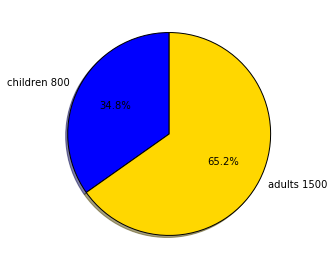

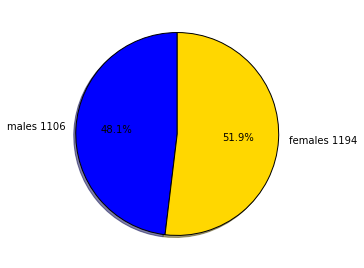

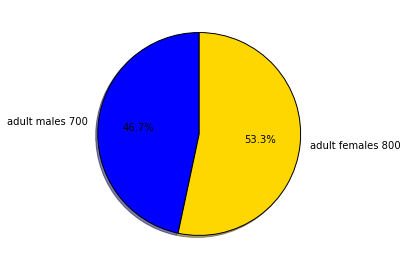

In [56]:
# I haven't appended the data to the original stats DF yet

# Explain what these stats say about the entire dataset as well as each of the above subsets.

# Demographics - adults vs children
children=child_data.shape[0]
adults=df.shape[0]-children
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
ax1.pie([children,adults],
       labels=['children '+ str(children),'adults '+str(adults)],
       colors=['blue','gold'],
       autopct='%1.1f%%',shadow=True,startangle=90)

# Demographics - males vs female
males=df[df['patient_gender']=='male'].shape[0]
females=df.shape[0]-males
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(222)
ax1.pie([males,females],
       labels=['males '+ str(males),'females '+str(females)],
       colors=['blue','gold'],
       autopct='%1.1f%%',shadow=True,startangle=90)

# Demographics - adult males vs adult femails
adult_males=male_data.shape[0]
adult_females=female_data.shape[0]
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(223)
ax1.pie([adult_males,adult_females],
       labels=['adult males '+ str(adult_males),'adult females '+str(adult_females)],
       colors=['blue','gold'],
       autopct='%1.1f%%',shadow=True,startangle=90)

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

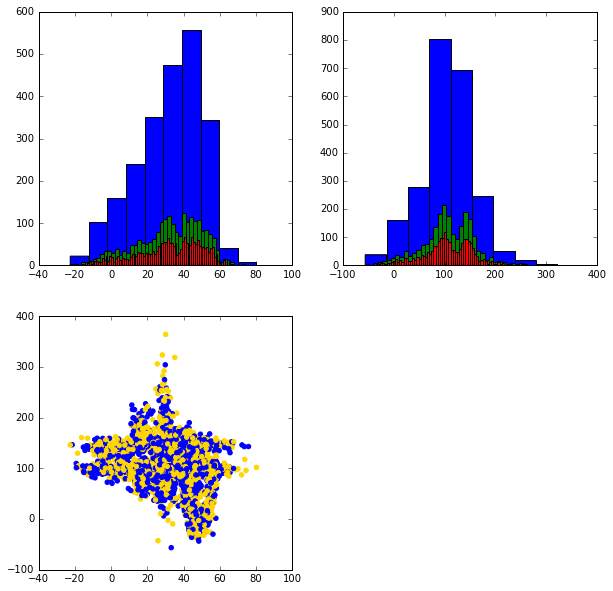

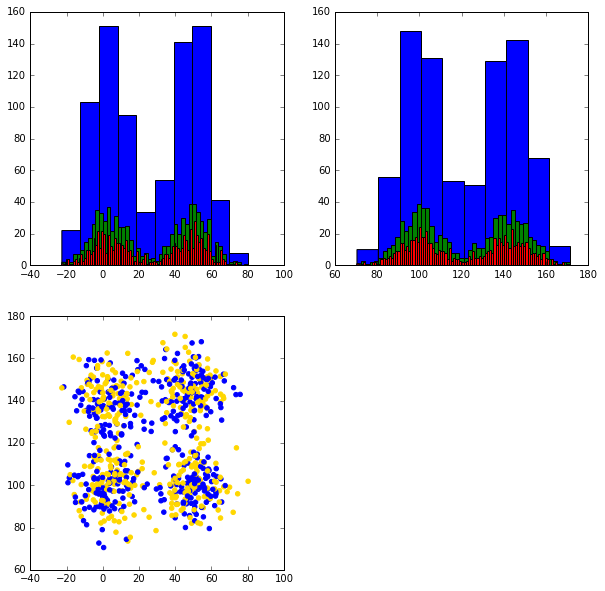

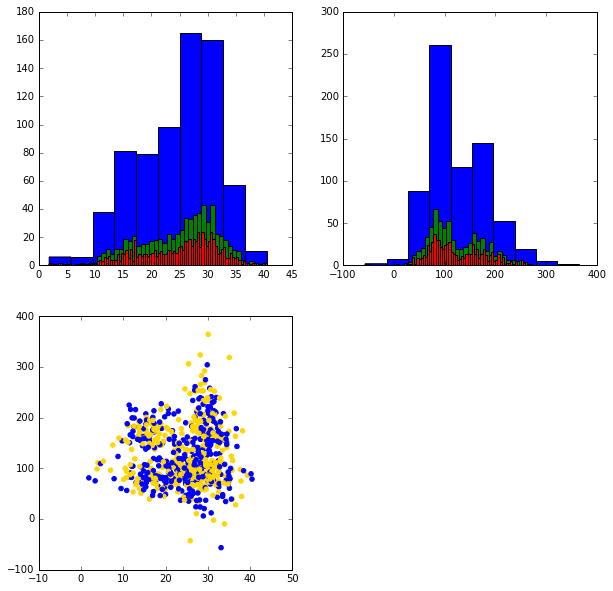

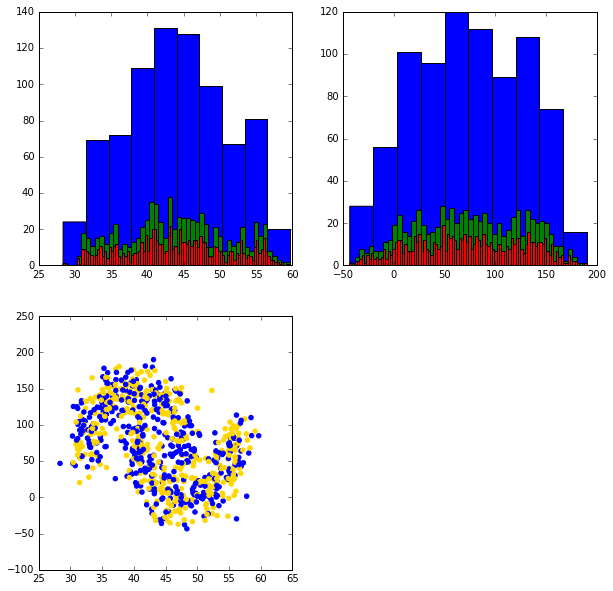

In [73]:
fig=plt.figure(figsize=(10,10))
# marker 1 histogram
mk1=fig.add_subplot(221)
mk1.hist(df['marker_1'],10)
mk1.hist(df['marker_1'],50)
mk1.hist(df['marker_1'],100)
# marker 2 histogram
mk2=fig.add_subplot(222)
mk2.hist(df['marker_2'],10)
mk2.hist(df['marker_2'],50)
mk2.hist(df['marker_2'],100)

# marker 1 v marker 2 scatter
mk3=fig.add_subplot(223)
mk3.scatter(df['marker_1'],df['marker_2'],color=['blue','gold'])

#figure 2 children
fig2=plt.figure(figsize=(10,10))
# marker 1 histogram
mk1=fig2.add_subplot(221)
mk1.hist(child_data['marker_1'],10)
mk1.hist(child_data['marker_1'],50)
mk1.hist(child_data['marker_1'],100)
# marker 2 histogram
mk2=fig2.add_subplot(222)
mk2.hist(child_data['marker_2'],10)
mk2.hist(child_data['marker_2'],50)
mk2.hist(child_data['marker_2'],100)

# marker 1 v marker 2 scatter
mk3=fig2.add_subplot(223)
mk3.scatter(child_data['marker_1'],child_data['marker_2'],color=['blue','gold'])

#figure 3 adult males
fig3=plt.figure(figsize=(10,10))
# marker 1 histogram
mk1=fig3.add_subplot(221)
mk1.hist(male_data['marker_1'],10)
mk1.hist(male_data['marker_1'],50)
mk1.hist(male_data['marker_1'],100)
# marker 2 histogram
mk2=fig3.add_subplot(222)
mk2.hist(male_data['marker_2'],10)
mk2.hist(male_data['marker_2'],50)
mk2.hist(male_data['marker_2'],100)

# marker 1 v marker 2 scatter
mk3=fig3.add_subplot(223)
mk3.scatter(male_data['marker_1'],male_data['marker_2'],color=['blue','gold'])

#figure 4 adult females
fig4=plt.figure(figsize=(10,10))
# marker 1 histogram
mk1=fig4.add_subplot(221)
mk1.hist(female_data['marker_1'],10)
mk1.hist(female_data['marker_1'],50)
mk1.hist(female_data['marker_1'],100)
# marker 2 histogram
mk2=fig4.add_subplot(222)
mk2.hist(female_data['marker_2'],10)
mk2.hist(female_data['marker_2'],50)
mk2.hist(female_data['marker_2'],100)

# marker 1 v marker 2 scatter
mk3=fig4.add_subplot(223)
mk3.scatter(female_data['marker_1'],female_data['marker_2'],color=['blue','gold'])


### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**